<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab08_Derivadas_e_integrales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sc
import sympy as sy
from scipy.interpolate import lagrange
from scipy.integrate import quad, trapz, simps

## Parte 1

En un cirtcuito con un voltaje de  $\varepsilon(t)$ y una inductancia de L, la primera ley de kirshhoff nos da la siguiente relación

\begin{equation}
\varepsilon(t) = L\frac{\mathrm{d}i}{\mathrm{d}t} + Ri
\end{equation}

donde $R$, es la resistencia del ciruito, $I$ es la corriente. Suponga que medimos la corriente con varios valores de $t$ y obtenemos:

``t = 1.00, 1.01, 1.02, 1.03, 1.0``

``i = 3.10, 3.12, 3.14, 3.18, 3.24``


donde $t$ se mide en segundos, $I$ se da en Amperios, la inductancia $L$ es una constante de 0.98 H, la resistencia es de 0.142 $\Omega$. Aproxime el votaje  $\varepsilon(t)$ en los valores t=1.00, 1.01, 1.02, 1.03, 1.04 ,  para ello realice lo siguiente:


- Construya un data frame de pandas con los valores de tiempo y corriente
- Emplee un metodo calcular la derivada numérica.

In [ ]:
t = np.array([1.00, 1.01, 1.02, 1.03, 1.04])
i = np.array([3.10, 3.12, 3.14, 3.18, 3.24])

data = {'Tiempo(s)':t, 'Corriente(A)':i}
df= pd.DataFrame(data)
df


,Tiempo(s),Corriente(A)
0,1.00,3.10
1,1.01,3.12
2,1.02,3.14
3,1.03,3.18
4,1.04,3.24


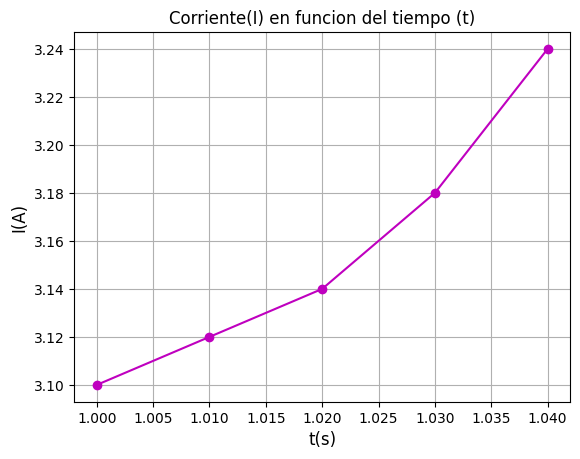

In [ ]:
plt.figure()
plt.plot(df['Tiempo(s)'], df['Corriente(A)'], '.m-', markersize=12)
plt.title('Corriente(I) en funcion del tiempo (t)')
plt.xlabel('t(s)', fontsize=12)
plt.ylabel('I(A)', fontsize=12)
plt.grid()

#Derivadas númericas

In [ ]:
derivada= np.gradient(i,t)
derivada

array([2., 2., 3., 5., 6.])

In [ ]:
L= 0.98
R= 0.142
E_t= L*derivada+ R*i
df['Fem(V)']= E_t
df

,Tiempo(s),Corriente(A),Fem(V)
0,1.00,3.10,2.40020
1,1.01,3.12,2.40304
2,1.02,3.14,3.38588
3,1.03,3.18,5.35156
4,1.04,3.24,6.34008


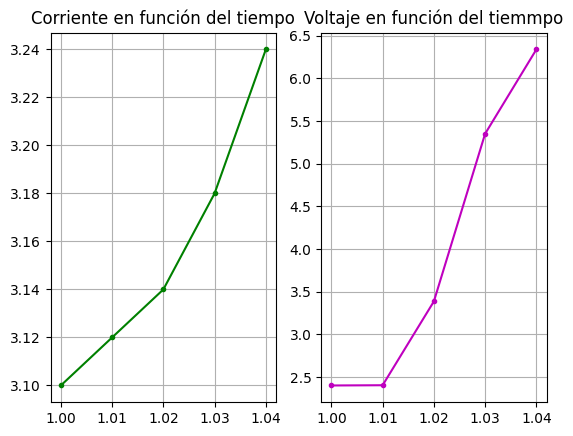

In [ ]:
fig, axs= plt.subplots(1,2)
axs[0].plot(df['Tiempo(s)'], df['Corriente(A)'], '.g-')
axs[0].set_title('Corriente en función del tiempo')
axs[0].grid()
axs[1].plot(df['Tiempo(s)'], df['Fem(V)'], '.m-')
axs[1].set_title('Voltaje en función del tiemmpo')
axs[1].grid()

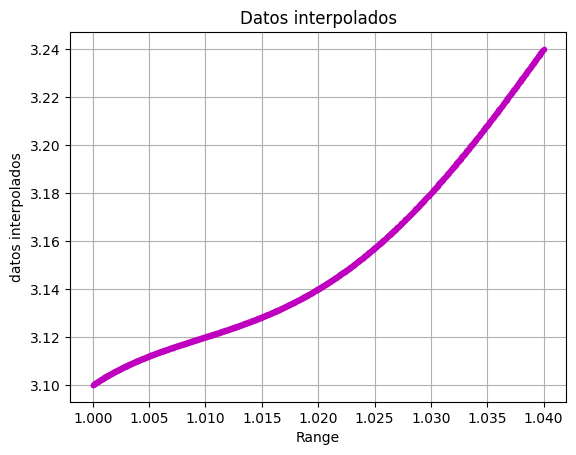

In [ ]:
#polinomio de la grange
range= np.linspace(min(t),max(t),1000)
poli= lagrange(t,i)
plt.plot(range, poli(range),'.m-')
plt.title('Datos interpolados')
plt.xlabel('Range')
plt.ylabel('datos interpolados')
plt.grid()

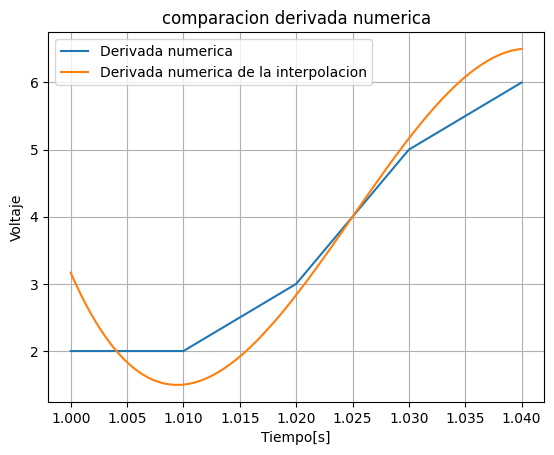

In [ ]:
h= 1e-6
derivate= (1/(2*h))*(-3*poli(range)+4*poli(range + h)-poli(range + 2*h))
plt.plot(df['Tiempo(s)'], derivada, label='Derivada numerica')
plt.plot(range,derivate, label= 'Derivada numerica de la interpolacion')
plt.title('comparacion derivada numerica')
plt.xlabel('Tiempo[s]')
plt.ylabel('Voltaje')
plt.legend()
plt.grid()

## Parte 2
1. Escribir en código Markdown la expresión para calcular una integral con la regla del trapecio.

2. Escribir en código Markdown la expresión para calcular una integral con la regla del simpson.

3. Escribir en código Markdown la expresión para calcular una integral con el metodo de cuadratura.

4. Calcular una aproximación con el metodo 1,2,3 de las siguientes integrales

---
$$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\mathrm{dx}
 $$

----
$$
 \int_{1}^{\infty} \frac{\cos x}{x^3}\mathrm{dx}
 $$


----

$$
 \int_{0}^{\pi/4} \int_{0}^{\sin x} \frac{1}{\sqrt{1-y^2}}\mathrm{dxdy}
 $$

---

Garantizando  que el error sea menor a $\varepsilon=1\times 10^{-5}$.

In [ ]:
#definiendo el error
E= 1e-5

###**regla de trapecio**
dada la formula: $$\int_{a}^{b} f(x) dx = \frac {h}{2} [f(a) +2 \sum_{i=1}^{n-1} f(x_{i} + f(b) ] $$

 donde $$h=\frac{b-a}{n}$$

con error: $$E=-\frac{(b-a)^{3}}{12n^{2}} f''(\xi)$$

donde:

b= limite final

a= limite inicial

n = numero de intervalos







In [ ]:
f1= lambda x: 1/np.sqrt(np.tan(x))

In [ ]:
#para garantizar el error que se pide
x=sy.Symbol('x')
f1_=1/(sy.tan(x))**(1/2)
d1f1=sy.diff(f1_,x)
d2f1=sy.diff(d1f1,x)
print(d2f1)

(-1.5*tan(x)**2 - 1.5)*(-0.5*tan(x)**2 - 0.5)/tan(x)**2.5 - 0.5*(2*tan(x)**2 + 2)/tan(x)**0.5


In [ ]:
#tomando las derivadas
d1f1= lambda x: ((-1/2)*np.tan(x)**2 - 0.5 /np.tan(x)**(3/2))
d2f1 = lambda x: (-1.5*np.tan(x)**2 -1.5)*(-0.5*np.tan(x)**2 -0.5)/np.tan(x)**2.5 - 0.5*(2*np.tan(x)**2+2)/np.tan(x)**0.5
d2f1_invertida= lambda x: (-1)*(-1.5*np.tan(x)**2 -1.5)*(-0.5*np.tan(x)**2 -0.5)/np.tan(x)**2.5 - 0.5*(2*np.tan(x)**2+2)/np.tan(x)**0.5  #para garantizar el valor maximo de la funcion entre [a,b]

#limites
a=0.01
b= np.pi/2
n=30000
x=np.linspace(a,b,n)
fe= d2f1_invertida(min(x)) #valor maximo la funcion derivada dos veces
E= ((b-a)**3/(12*n**2))* fe
print(f' el valor del error es {E}')

 el valor del error es -2.641099598981565e-05


In [ ]:
#integral
def integral_trap(f,a,b,N):
  x=np.linspace(a,b, int(N))
  h= (b-a)/N
  integral= (f(x[0])+f(x[-1])+2*f(x[1:-1]).sum())*0.5*h
  return integral
integralf1_trap=integral_trap(f1,0.01,np.pi/2,30000)
#redefiniendo el intervalo para la funcion en sympy
x=np.linspace(a,b,n)
integralf1= sc.integrate.trapezoid(f1(x),x)

print(f'''el resultado de la integral con el codigo creado es {integralf1_trap} y con scipy es {integralf1}.
 entonces comparando el resultado de scipy con el del codigo creado es {integralf1_trap/integralf1}''' )

el resultado de la integral con el codigo creado es 2.0213747891243945 y con scipy es 2.021442170530079.
 entonces comparando el resultado de scipy con el del codigo creado es 0.9999666666666667


####**Regla de Simpson Compuesta**

Con formula:
$$\int_{a}^{b} f(x) dx = \frac {h}{3} [f(a)+2 \sum_{j=1}^{(n/2)-1} f(x_{2j}) + 4 \sum_{j=1}^{n/2} f(x_{2j}) + f(b)]$$

Y error:$$E=-\frac{b-a}{180} {h}^{4} {f}^{(4)}(\xi) =-\frac{{(b-a)}^{5}}{2880 {n}^{4}} {f}^{(4)}(\xi)$$

In [ ]:
#calculando el error
x_= sy.Symbol('x')
f1_= 1/(sy.tan(x_))**(1/2)
d1f1= sy.diff(f1_,x_)
d2f1=sy.diff(d1f1,x_)
d3f1=sy.diff(d2f1,x_)
d4f1_=sy.diff(d3f1,x_)

In [ ]:
#tomando la cuarta derivada para el error
d4f1=sy.lambdify(x_,d4f1_, 'numpy') #llevandola a objeto de numpy
x= np.linspace(0.01,np.pi/2,3000)
d4f1_inversa= lambda x: (-1)*d4f1(x)
error=d4f1_inversa(min(x))

In [ ]:
a=0.01
b=np.pi/2
n=3000
h=(b-a)/2*n
E= ((b-a)**5/(2880*(n**4)))*error
print(f'el error asociado es {E}')

el error asociado es -2.6056876873415987e-07


In [ ]:
def regla_simpson_compuesta(f,a,b,N):
  x1=np.linspace(a,b,int(N))
  h=x1[1]-x1[0]
  integral= (h/3)*(f(a)+f(b)+2*f(x1[2:int(N-2):2]).sum() + 4*f(x1[1:int(N-1):2]).sum())
  return integral

integral_simpson= regla_simpson_compuesta(f1,0.01,np.pi/2,3000) #f1 es la funcion que se definio desde el inicio

#resultado con scipy
x=np.linspace(0.01,np.pi/2,3000)
integralf1_simpson=sc.integrate.simpson(f1(x),x)

print(f'''el resultado de la integral con el codigo creado es {integral_simpson} y el resultado con scipy es {integralf1_simpson}.
entonces comparando el resultado de scipy con el del codigo creado es {integralf1_simpson/integral_simpson}''')

el resultado de la integral con el codigo creado es 2.021430255620533 y el resultado con scipy es 2.021440729234451. 
entonces comparando el resultado de scipy con el del codigo creado es 1.0000051812887876


####**Metodo de cuadratura**

$$\sum_{i=1}^{n} w_i f(x_i) $$

en donde

w son los pesos asociados a los puntos de integracion

x son los puntos de integracion

f(x) es la funicion a integrar

In [ ]:
f1= lambda x: 1/ np.sqrt(np.tan(x))
a1=0.01
b1= np.pi/2
integral1,_ = quad(f1,a1,b1)
print(f'el resultado de la integral 1 por medio del método de cuadratura es {integral1}')

el resultado de la integral 1 por medio del método de cuadratura es 2.021442135751406


#### ahora se hallará el valor aproximado de las integrales 2 y 3 por medio de libreria


In [ ]:
#segunda integral
funcion2 = lambda  x : np.cos(x)/ (x**3)
a2= 1
b2= 1e6
x= np.linspace(a2,10,1000)
y= funcion2(x)
trapecio2 = trapz(y,x)
simpson2= simps(y,x)
quad2,_= quad(funcion2, a2, np.inf, limit=500)
print(f'el resultado de la integral por medio del trapecios es {trapecio2}')
print(f'el resultado de la integral por medio de la regla de simpsons es {simpson2}')
print(f'el resultado de la integral por medio de cuadratura es {quad2}')

el resultado de la integral por medio del trapecios es 0.01785679978713544
el resultado de la integral por medio de la regla de simpsons es 0.017840142668783664
el resultado de la integral por medio de cuadratura es 0.018117622548772427


In [11]:
#tercera integral, usando el metodo de simpson
x_= np.linspace(0, np.pi/4, 3000)

f3_doble= lambda x,y : 1 / (np.sqrt(1-(y**2)))

#integral doble
integralesy= np.zeros(len(x_))

for i, n in enumerate(x_):
  y_intervalo= np.linspace(0, np.sin(n),3000) #intervalo y
  integral = simps(f3_doble(n, y_intervalo), y_intervalo)
  integralesy[i]=integral

integral_doble= simps(integralesy,x_)
print(f'el valor de la integral doble es {integral_doble}')

el valor de la integral doble es 0.3084251375340436


## Parte 3
Un péndulo físico en el regimen de pequeñas oscilaciones tiene un periodo de:

\begin{equation}
P_0=2\pi \sqrt{\frac{I_0}{mgb}}
\end{equation}

Cuando las oscilaciones no son pequeñas, podemos encontrar una expresión para el periodo como sigue:


La energia de un péndulo físico viene dada por:

\begin{equation}
E=\frac{I_0\omega^2}{2}+mgb(1-\cos \theta)
\end{equation}

En el punto más alejado de su posición de equilibrio, su energía es solo potencial y viene dada por:

\begin{equation}
Ep = mgb(1-\cos \theta),
\end{equation}

Igualando ambas expresiones tenemos que:

\begin{equation}
mgb(1-\cos \theta)=\frac{I_0\omega^2}{2}+mgb(1-\cos \theta)
\end{equation}

Integrando la ecuación respecto a $\theta$ y realizando la sustitución:

$\sin \phi = \frac{\sin \frac{\theta}{2}}{\sin \frac{\theta_0}{2}}$ y  $k = \sin \frac{\theta_0}{2}$, se puede encontrar  que el periodo de oscilación, viene dado en terminos de  la integral elíptica completa de primera especie:


\begin{equation}
P = \frac{2P_0}{\pi} \int _0^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}

donde,  $P_0$ es el periodo de las oscilaciones pequeñas.

Determinar el periodo de oscilación de un péndulo. Para ello:

1. Suponga los párametros iniciales del pendulo.
2. Realice una buena planificación del código para calcular la integral.
3. Emplee un  método de integracion numérico que conozca.
4. Compruebe su solucion con el valor exacto de la integral mostrado en el punto

In [ ]:
#datos
b= 0.5 #longitud[m]
g= 9.8 #gravedad [m/s^2]
I_0= 83.33e-6 #[kg m^2] momento de inercia de una varilla
m= 0.1 #[kg] masa

P_0 =2*np.pi*np.sqrt((I_0/(m*g*b)))


In [ ]:
#valores de theta para k
theta_0=np.linspace(np.deg2rad(0.1),np.deg2rad(45),100)
#funcion periodo de oscilacion
def periodo_osci(theta_0,phi):

  K=np.sin(theta_0/2)
  P_1=(2*P_0)/np.pi
  P_2= P_1*(1/(np.sqrt(1-(K**2)*(np.sin(phi))**2)))
  return P_2

In [ ]:
#utilizando el metodo de trapezoide
phi=np.linspace(0,np.pi/2,1000)

integral_trap=np.zeros(len(theta_0))
for i,n in enumerate(theta_0):
  a=sc.integrate.trapezoid(periodo_osci(n,phi),phi)
  integral_trap[i]=a

integral_trap

array([0.08193748, 0.08193794, 0.08193905, 0.08194079, 0.08194318,
       0.08194621, 0.08194988, 0.0819542 , 0.08195915, 0.08196475,
       0.081971  , 0.08197788, 0.08198541, 0.08199358, 0.0820024 ,
       0.08201186, 0.08202197, 0.08203272, 0.08204412, 0.08205616,
       0.08206885, 0.08208219, 0.08209618, 0.08211081, 0.0821261 ,
       0.08214203, 0.08215862, 0.08217585, 0.08219374, 0.08221228,
       0.08223148, 0.08225133, 0.08227183, 0.08229299, 0.08231481,
       0.08233729, 0.08236042, 0.08238422, 0.08240868, 0.0824338 ,
       0.08245958, 0.08248603, 0.08251314, 0.08254092, 0.08256937,
       0.08259848, 0.08262827, 0.08265873, 0.08268986, 0.08272167,
       0.08275415, 0.08278731, 0.08282115, 0.08285567, 0.08289088,
       0.08292676, 0.08296334, 0.08300059, 0.08303854, 0.08307718,
       0.08311651, 0.08315653, 0.08319725, 0.08323867, 0.08328078,
       0.0833236 , 0.08336712, 0.08341134, 0.08345628, 0.08350192,
       0.08354827, 0.08359534, 0.08364312, 0.08369162, 0.08374

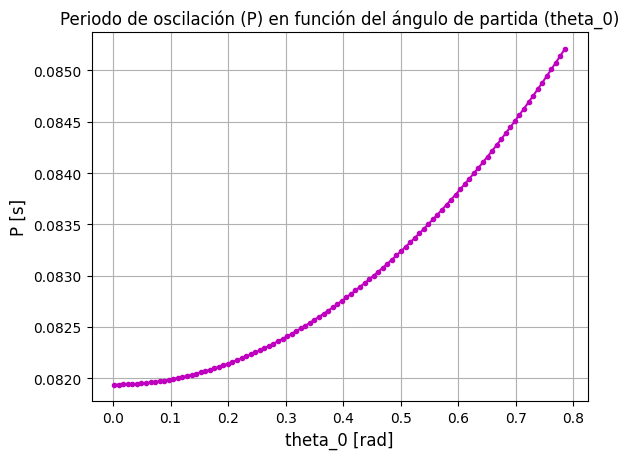

In [ ]:
#Gráfico perido de oscilación en función theta
plt.figure()
plt.plot(theta_0,integral_trap,'.m-')
plt.title('Periodo de oscilación (P) en función del ángulo de partida (theta_0)', fontsize=12)
plt.xlabel('theta_0 [rad]', fontsize=12)
plt.ylabel('P [s]', fontsize=12)
plt.grid()

In [ ]:
#utilizando metodo diferente, integrate.simpson
phi=np.linspace(0,np.pi/2,1000)

integral_simpson=np.zeros(len(theta_0))
for i,n in enumerate(theta_0):
  b=sc.integrate.simpson(periodo_osci(n,phi),phi)
  integral_simpson[i]=b


array([0.08193748, 0.08193794, 0.08193905, 0.08194079, 0.08194318,
       0.08194621, 0.08194988, 0.0819542 , 0.08195915, 0.08196475,
       0.081971  , 0.08197788, 0.08198541, 0.08199358, 0.0820024 ,
       0.08201186, 0.08202197, 0.08203272, 0.08204412, 0.08205616,
       0.08206885, 0.08208219, 0.08209618, 0.08211081, 0.0821261 ,
       0.08214203, 0.08215862, 0.08217585, 0.08219374, 0.08221228,
       0.08223148, 0.08225133, 0.08227183, 0.08229299, 0.08231481,
       0.08233729, 0.08236042, 0.08238422, 0.08240868, 0.0824338 ,
       0.08245958, 0.08248603, 0.08251314, 0.08254092, 0.08256937,
       0.08259848, 0.08262827, 0.08265873, 0.08268986, 0.08272167,
       0.08275415, 0.08278731, 0.08282115, 0.08285567, 0.08289088,
       0.08292676, 0.08296334, 0.08300059, 0.08303854, 0.08307718,
       0.08311651, 0.08315653, 0.08319725, 0.08323867, 0.08328078,
       0.0833236 , 0.08336712, 0.08341134, 0.08345628, 0.08350192,
       0.08354827, 0.08359534, 0.08364312, 0.08369162, 0.08374

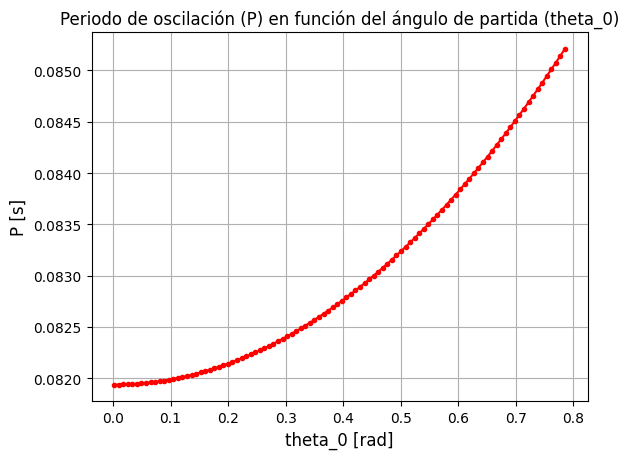

In [ ]:
#Gráfico perido de oscilación en función theta
plt.figure()
plt.plot(theta_0,integral_simpson,'.r-')
plt.title('Periodo de oscilación (P) en función del ángulo de partida (theta_0)', fontsize=12)
plt.xlabel('theta_0 [rad]',fontsize=12)
plt.ylabel('P [s]',fontsize=12)
plt.grid()

## Parte 4
The next  problems are examples of how elliptic integrals enter into realistic physics problems. It is straightforward to evaluate any integral numerically using the techniques of this chapter, but it may be difficult for you to  know if the answers you obtain are correct. One way to hone your integral evaluating skills is to compare your answers from quadrature to power series
expressions, or to a polynomial approximations of know precision. To help you in this regard, we present here a polynomial approximation for an elliptic integral (Abramowitz and Stegun, 1972):

\begin{equation}
K(m)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-m\sin^2\phi}}
\end{equation}

\begin{equation}
\approx a_0+a_1m_1+a_2m_2 - [ b_0+b_1m_1+b_2m_1^2]\ln m_1 + \epsilon(m)
\end{equation}


* $m_1 = 1-m$,

* $ 0 \le m \le1 $

* $\epsilon(m)\leq 3\times 10^{-5}$

* $a_0 = 1.3862944$

* $b_0 = 0.5$

* $a_1 = 0.1119723$

* $b_1 = 0.1213478$

* $a_2 = 0.00725296$

* $b_2 = 0.0288729$

In [17]:
a0= 1.3862944
b0= 0.5
a1= 0.1119723
b1= 0.1213478
a2= 0.00725296
b2= 0.0288729

def integral_eliptica(m):
  m1 = 1 - m
  epsilon = 3e-5
  if m >=0 and m<=1:
    return a0 + a1*m1 + a2*m1 - ( b0 + b1*m1 + b2 * (m1**2))* np.log(m1) + epsilon
  else:
    return ('el valor de m debe pertenecer al rango')

## Parte 5 (Opcional)

Figure 5.7 shows a current loop of radius a carrying a current I. The point P
is a distance r from the center of the loop with spherical coordinates (r, θ, φ).
Jackson (1988) solves for the φ component of the vector potential at point P
in terms of elliptic integrals:

\begin{equation}
A_{\phi}(r, \theta)=\frac{\mu_0}{4\pi}\frac{4Ia}{\sqrt{a^2+r^2+2ar\sin \theta}}\left(\frac{(2-k^2)K(k)-2E(k)}{k^2} \right)
\end{equation}


where

\begin{equation}
K(k)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}


\begin{equation}
E(k)=\int_{0}^{\pi/2} \mathrm{d\phi} \sqrt{1-k^2\sin^2\phi}
\end{equation}


\begin{equation}
k^2=\frac{4ar\sin\theta}{a^2+r^2+2ar\sin\theta}
\end{equation}



Here K(k) is a complete elliptic integral of the first kind and E(k) is a complete
elliptic integral of the second kind. For a = 1, I = 3, and μ0∕4π = 1, compute
and plot

a) Aφ(r = 1.1, θ) vs. θ

b) Aφ(r, θ = π∕3) vs. r
